In [1]:
from __future__ import print_function
import tensorflow as tf
from IPython.display import Image
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("/tmp/data", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1
logs_path = "/tmp/tensorflow_logs/mnist_adv"

In [4]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [5]:
# tf Graph Input
# mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition => 10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')


In [6]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Create a summary to visualize the first layer ReLU activation
    tf.summary.histogram("relu1", layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Create another summary to visualize the second layer ReLU activation
    tf.summary.histogram("relu2", layer_2)
    # Output layer
    out_layer = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'], name= "pred")
    return out_layer


In [7]:
# Store layers weight & bias
weights = {
    'w1': tf.Variable(tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'w2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'w3': tf.Variable(tf.random_normal([n_hidden_2, n_classes]), name='W3')
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(tf.random_normal([n_hidden_2]), name='b2'),
    'b3': tf.Variable(tf.random_normal([n_classes]), name='b3')
}


In [8]:
# Encapsulating all ops into scopes, making Tensorboard's Graph
# Visualization more convenient
with tf.name_scope('Model'):
    # Build model
    pred = multilayer_perceptron(x, weights, biases)

with tf.name_scope('Loss'):
    # Softmax Cross entropy (cost function)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    # Op to calculate every variable gradient
    grads = tf.gradients(loss, tf.trainable_variables())
    grads = list(zip(grads, tf.trainable_variables()))
    # Op to update all variables according to their gradient
    apply_grads = optimizer.apply_gradients(grads_and_vars=grads)

with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

In [9]:
# Initializing the variables
init = tf.global_variables_initializer()

In [10]:
# Create a summary to monitor cost tensor
l = tf.summary.scalar("loss", loss)
# Create a summary to monitor accuracy tensor
a = tf.summary.scalar("accuracy", acc)
# Create summaries to visualize weights
for var in tf.trainable_variables():
    tf.summary.histogram(var.name, var)

# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

INFO:tensorflow:Summary name W1:0 is illegal; using W1_0 instead.
INFO:tensorflow:Summary name W2:0 is illegal; using W2_0 instead.
INFO:tensorflow:Summary name W3:0 is illegal; using W3_0 instead.
INFO:tensorflow:Summary name b1:0 is illegal; using b1_0 instead.
INFO:tensorflow:Summary name b2:0 is illegal; using b2_0 instead.
INFO:tensorflow:Summary name b3:0 is illegal; using b3_0 instead.


In [11]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path,
                                            graph=tf.get_default_graph())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([apply_grads, loss, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))
    print("Run the command line:\n" \
          "tensorboard --logdir=/tmp/tensorflow_logs/mnist_adv " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

Epoch: 0001 cost= 67.150202213
Epoch: 0002 cost= 12.268419317
Epoch: 0003 cost= 7.523915138
Epoch: 0004 cost= 5.278091628
Epoch: 0005 cost= 4.015243521
Epoch: 0006 cost= 3.222720151
Epoch: 0007 cost= 2.640030454
Epoch: 0008 cost= 2.210983938
Epoch: 0009 cost= 1.891068206
Epoch: 0010 cost= 1.608917327
Epoch: 0011 cost= 1.404836672
Epoch: 0012 cost= 1.242017006
Epoch: 0013 cost= 1.081858548
Epoch: 0014 cost= 0.963336731
Epoch: 0015 cost= 0.854181849
Epoch: 0016 cost= 0.765708759
Epoch: 0017 cost= 0.692286493
Epoch: 0018 cost= 0.614173050
Epoch: 0019 cost= 0.566365379
Epoch: 0020 cost= 0.507138083
Epoch: 0021 cost= 0.445538927
Epoch: 0022 cost= 0.415080317
Epoch: 0023 cost= 0.372132326
Epoch: 0024 cost= 0.343869209
Epoch: 0025 cost= 0.311307994
Optimization Finished!
Accuracy: 0.9208
Run the command line:
tensorboard --logdir=/tmp/tensorflow_logs/mnist_adv 
Then open http://0.0.0.0:6006/ into your web browser


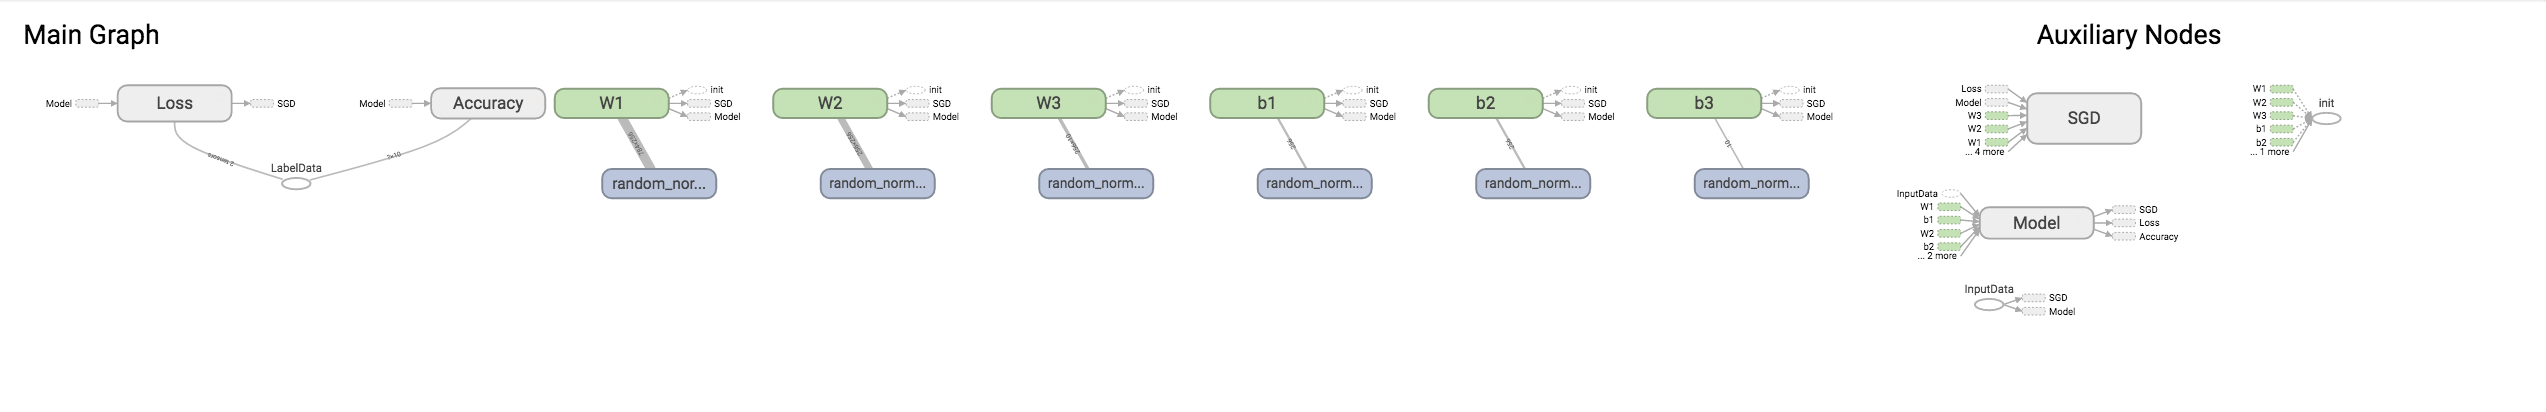

In [15]:
Image("/Users/gaurikatyagi/Documents/deep_learning/deep_learning_tensorflow/images/hidden_layer_graphs.png")

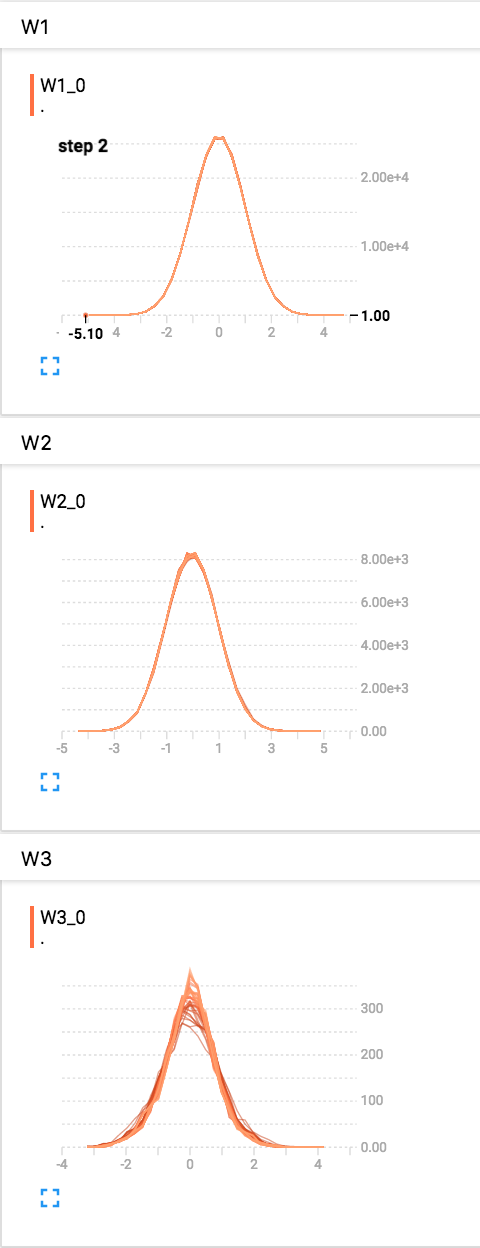

In [19]:
Image("/Users/gaurikatyagi/Documents/deep_learning/deep_learning_tensorflow/images/histogram_weights.png") 

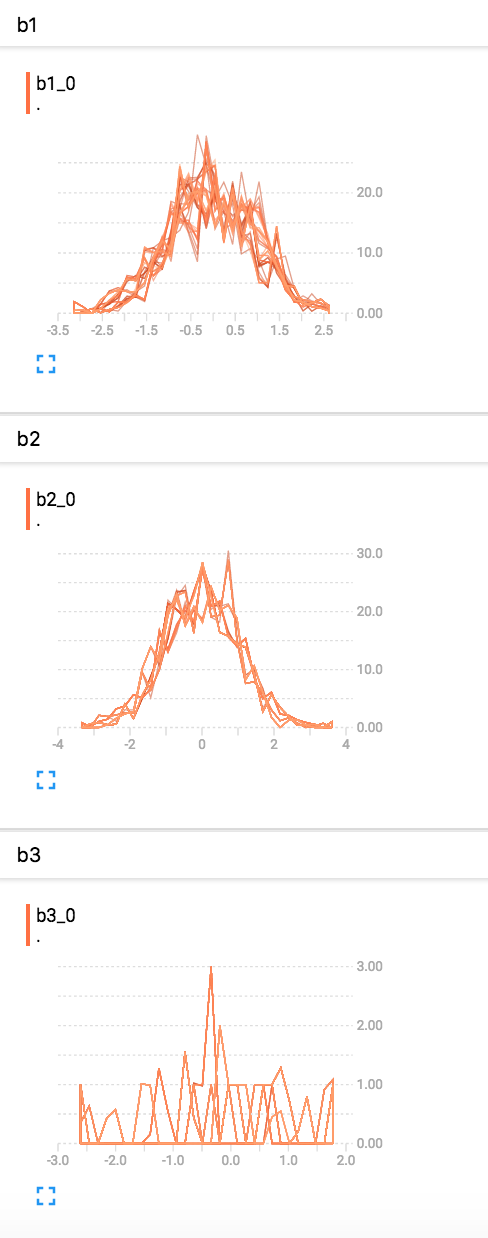

In [20]:
Image("/Users/gaurikatyagi/Documents/deep_learning/deep_learning_tensorflow/images/histogram_biases.png")

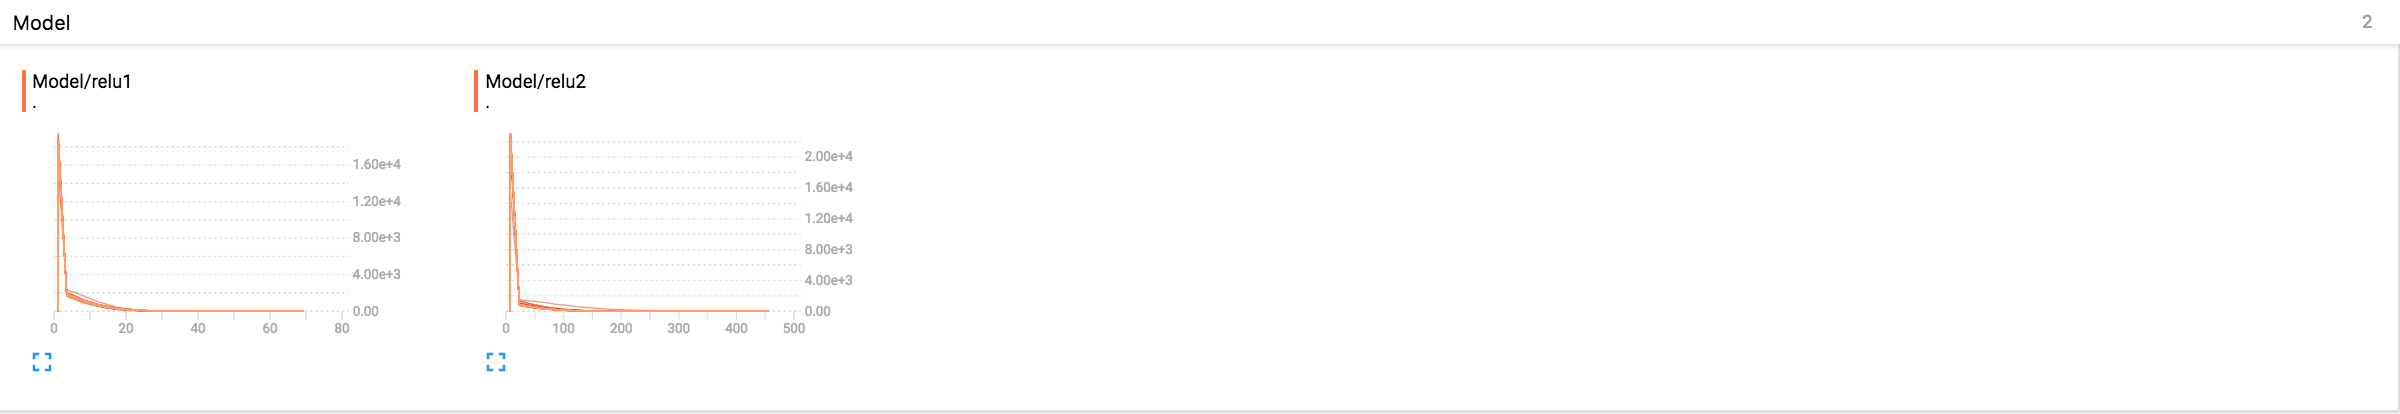

In [21]:
Image("/Users/gaurikatyagi/Documents/deep_learning/deep_learning_tensorflow/images/model_relu.png")